# Linear Regression

La **regressione lineare** è un approccio che cerca di trovare una **relazione lineare** tra una **variabile dipendente** e una **variabile indipendente** riducendo al minimo la distanza come mostrato di seguito.

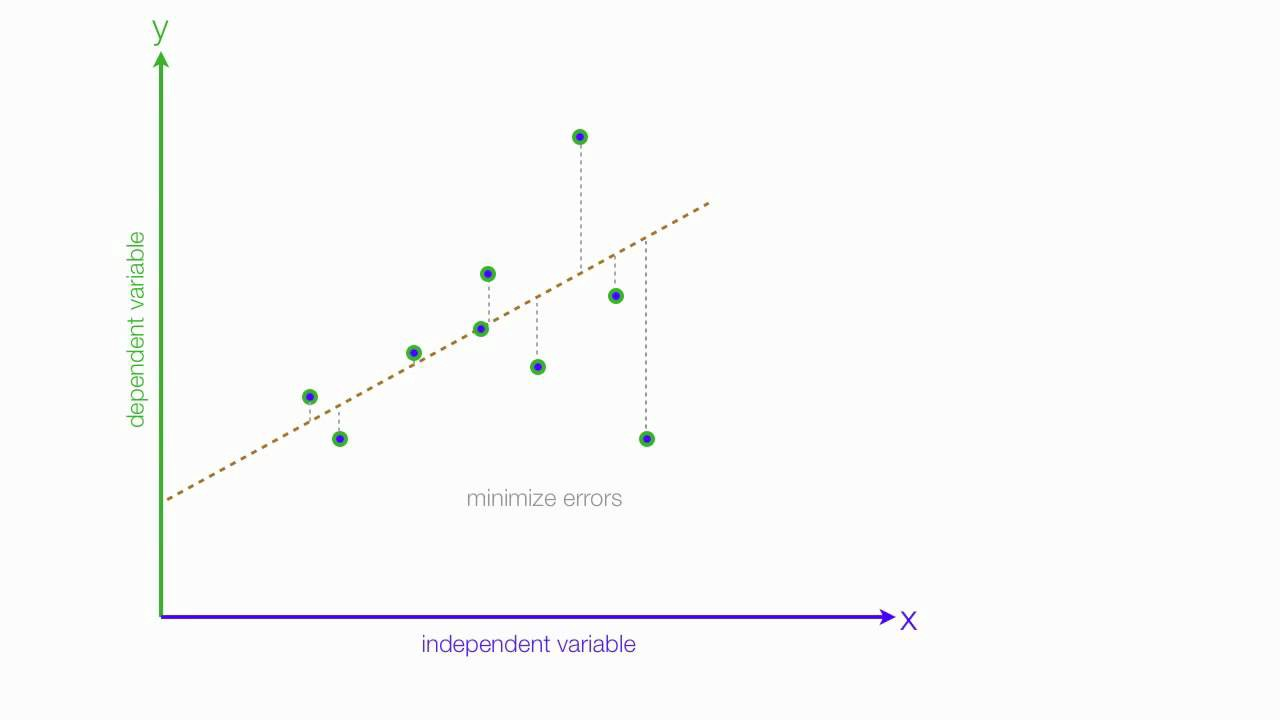

In [322]:
from IPython.display import Image 
Image(filename = "images\LinearRegr.jpeg", width=656, height=918)

Una relazione è di tipo **lineare** se, rappresentata su assi cartesiane, si avvicina alla forma di una retta. Ovvero può essere espressa con una equazione tipo y = ax + b

Una variabile è **indipendente** se non dipende da nessuna variabile (ad esempio x) mentre è **dipendente** se dipende da una o più variabili. Ad esempio nella equazione y = ax + b, x è una variabile indipendente mentre y è dipendente da x

In statistica la **regressione lineare** rappresenta un metodo di stima del valore atteso condizionato di una variabile dipendente Y, dati i valori di altre variabili indipendenti X1...Xk

## PyTorch

Ora vediamo come implementare una rete neurale con PyTorch che calcola una semplice regressione lineare

Consideriamo un'equazione lineare molto semplice, cioè **y=2x+1**. Qui, "x" è la variabile indipendente e y è la variabile dipendente. Useremo questa equazione per creare un set di dati fittizio che verrà utilizzato per addestrare questo modello di regressione lineare.

Di seguito è riportato il codice per la creazione del set di dati.

In [323]:
import numpy as np  #import di numpy

# inizializzo il seed del random
np.random.seed(42)

# create dummy data for training
#x_values = [i for i in range(11)] # creiamo i valori di x come range tra 1 e 10 , valori senza rumore
x_values = np.random.rand(30, 1)*10.0  # creo i valori con rumore
x_train = np.array(x_values, dtype=np.float32).reshape(-1, 1) # trasformiamo in un numpy array e mettiamo in colonna

#y_values = [2*i + 1 for i in x_values] # calcoliamo i valori della funzione y=2x+1 per i valori di x , valori senza rumore
y_values = [2*i + 1 for i in x_values] + np.random.randn(30, 1) * 0.5 # calcoliamo i valori con rumore
y_train = np.array(y_values, dtype=np.float32).reshape(-1, 1) # trasformiamo in un numpy array e mettiamo in colonna

Una volta creato il set di dati, possiamo iniziare a scrivere il codice per il nostro modello. La prima cosa sarà definire l'architettura del modello. Lo facciamo usando il seguente pezzo di codice.

In [324]:
import torch
from torch.autograd import Variable

# creo la classe linearRegression derivata torch.nn.Module , nota : self accede al'istanza della classe
class linearRegression(torch.nn.Module):  # torch.nn.Module è la classe base per tutte le reti neurali
    def __init__(self, inputSize, outputSize): # __init__ è il costruttore
        super(linearRegression, self).__init__() # chiamo il costruttore della classe base
        self.linear = torch.nn.Linear(inputSize, outputSize) # torch.nn.Linear applica una trasformazione lineare (y = xA^T+b) ai dati in entrata

    def forward(self, x):  # forward è il metodo per il calcolo dell'output
        out = self.linear(x) # applica la funzione torch.nn.Linear definita poche righe più sopra
        return out

Abbiamo definito una classe per la regressione lineare, che eredita torch.nn.Module che è il modulo base della Rete Neurale contenente tutte le funzioni richieste. 
Il nostro modello di regressione lineare contiene solo una semplice funzione lineare.

Successivamente, istanziamo il modello utilizzando il codice seguente.

In [325]:
inputDim = 1        # grandezza dimensione input x
outputDim = 1       # grandezza dimensione output y
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, outputDim) # istanzio la classe definita prima

##### For GPU #######
if torch.cuda.is_available():  # nel caso sia presente una GPU cuda la utilizzo
    model.cuda()

Successivamente, inizializziamo le funzioni di perdita (**Mean Squared Error**) e di ottimizzazione (**Stochastic Gradient Descent**) che utilizzeremo nell'addestramento di questo modello.

In [326]:
criterion = torch.nn.MSELoss() # Mean Squared Error , errore quadratico medio
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate) # Stochastic Gradient Descent , Discesa gradiente stocastico

Dopo aver completato tutte le inizializzazioni, ora possiamo iniziare ad addestrare il nostro modello. Di seguito è riportato il codice per l'addestramento del modello.

In [327]:
for epoch in range(epochs):
    # Conversione di input ed etichette in Variabile
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Cancella i buffer dei gradienti perché non vogliamo che alcun gradiente dell'epoca precedente venga portato avanti
    # in altre parole, non vogliamo cumulare i gradienti
    optimizer.zero_grad()
    # l'accumulazione del gradiente è una tecnica che permette di superare i limiti del proprio hardware
    # creando tanti minibatch da un grande singolo batch e cumulando il gradiente per i minibatch
    # in questo modo è possibile aggiornare i pesi del modello solo alla fine del batch e non dei vari minibatch
    # per ulteriori approfondimenti :
    # https://towardsdatascience.com/gradient-accumulation-overcoming-memory-constraints-in-deep-learning-36d411252d01

    # otteniamo l'output dal modello, dati gli input
    outputs = model(inputs)

    # otteniamo la perdita per l'output previsto
    loss = criterion(outputs, labels)
    print(loss) # stampiamo le perdite
    
    # otteniamo i gradienti rispetto ai parametri
    loss.backward()

    # update parametri
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(107.5145, grad_fn=<MseLossBackward>)
epoch 0, loss 107.51445007324219
tensor(21.6434, grad_fn=<MseLossBackward>)
epoch 1, loss 21.64341926574707
tensor(4.5121, grad_fn=<MseLossBackward>)
epoch 2, loss 4.512053966522217
tensor(1.0938, grad_fn=<MseLossBackward>)
epoch 3, loss 1.0937952995300293
tensor(0.4112, grad_fn=<MseLossBackward>)
epoch 4, loss 0.41121596097946167
tensor(0.2744, grad_fn=<MseLossBackward>)
epoch 5, loss 0.27439501881599426
tensor(0.2465, grad_fn=<MseLossBackward>)
epoch 6, loss 0.24645619094371796
tensor(0.2402, grad_fn=<MseLossBackward>)
epoch 7, loss 0.24024564027786255
tensor(0.2384, grad_fn=<MseLossBackward>)
epoch 8, loss 0.23837679624557495
tensor(0.2374, grad_fn=<MseLossBackward>)
epoch 9, loss 0.23738129436969757
tensor(0.2366, grad_fn=<MseLossBackward>)
epoch 10, loss 0.23656685650348663
tensor(0.2358, grad_fn=<MseLossBackward>)
epoch 11, loss 0.23579533398151398
tensor(0.2350, grad_fn=<MseLossBackward>)
epoch 12, loss 0.23503932356834412
tensor(0.234

Ora che il nostro modello di regressione lineare è stato addestrato, testiamolo. Poiché si tratta di un modello molto banale, lo testeremo sul nostro set di dati esistente e tracciamo anche il grafico per vedere l'originale rispetto agli output previsti.

In [328]:
with torch.no_grad(): # non abbiamo bisogno dei gradienti in fase di test
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)




[[ 8.330679 ]
 [19.733482 ]
 [15.404888 ]
 [12.766105 ]
 [ 4.006019 ]
 [ 4.005542 ]
 [ 2.067831 ]
 [18.060427 ]
 [12.814721 ]
 [14.93147  ]
 [ 1.3257029]
 [20.113373 ]
 [17.392822 ]
 [ 5.1206326]
 [ 4.516741 ]
 [ 4.5480003]
 [ 6.939446 ]
 [11.303543 ]
 [ 9.466755 ]
 [ 6.681909 ]
 [13.02723  ]
 [ 3.6789846]
 [ 6.700028 ]
 [ 8.168826 ]
 [ 9.9442005]
 [16.457388 ]
 [ 4.8699784]
 [11.095307 ]
 [12.642535 ]
 [ 1.8376036]]


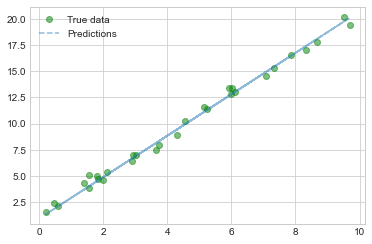

In [329]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.clf()

plt.plot(x_values, y_values, 'go', label='True data', alpha=0.5) # disegno i punti originali
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5) # disegno la linea calcolata dalla rete neurale
plt.legend(loc='best')
plt.show()


Il modello ha correttamente individuato la relazione lineare tra la variabile dipendente e indipendente.

# Altro esempio più complesso

In quest'altro caso preleviamo i dati dal foglio csv. I dati sono relativi a quello delle vendite di case negli anni 2012/2013.

In [570]:
my_data = np.genfromtxt('data/realestate.csv', delimiter=',', names=True)

Prendiamo come esempio la distanza delle case rispetto alle stazioni di metro

In [571]:
x_data = np.array(my_data['X3_distance_to_the_nearest_MRT_station'], dtype=np.float32).reshape(-1, 1)
# X2_house_age, X3_distance_to_the_nearest_MRT_station, X4_number_of_convenience_stores
y_data = np.array(my_data['Y_house_price_of_unit_area'], dtype=np.float32).reshape(-1, 1)

In [572]:
# minmax scaling
Scala = 1
XMin = np.amin(x_data)
XMax = np.amax(x_data)
x_data = ((x_data - XMin) / (XMax-XMin)) * Scala  

YMin = np.amin(y_data)
YMax = np.amax(y_data)
y_data = ((y_data - YMin) / (YMax-YMin)) * Scala

In [573]:
# divido il set di dati in due 
x_train, x_test = x_data[:332,:], x_data[332:,:]
y_train, y_test = y_data[:332,:], y_data[332:,:]

Vediamo il grafico che genera i dati

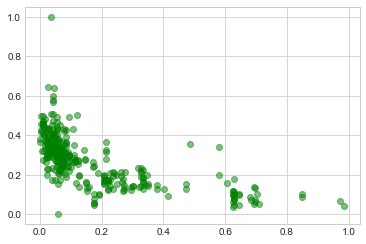

In [583]:
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5) # disegno i punti originali
plt.show()

In [584]:
inputDim = 1        # grandezza dimensione input x
outputDim = 1       # grandezza dimensione output y
learningRate = 0.3 
epochs = 200

model2 = linearRegression(inputDim, outputDim) # istanzio la classe definita prima

# Initialize conv weights with Gaussian random values
#for m in model2.modules():
#    if isinstance(m, nn.Conv2d):
#        n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
#        m.weight.data.normal_(0, math.sqrt(2. / n))
        

In [585]:
criterion2 = torch.nn.MSELoss(reduction='mean') # Mean Squared Error , errore quadratico medio
optimizer2 = torch.optim.SGD(model2.parameters(), lr=learningRate) # Stochastic Gradient Descent , Discesa gradiente stocastico

In [586]:
LossStory = np.zeros((epochs))

for epoch in range(epochs):
    # Conversione di input ed etichette in Variabile
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))

    #------------------------------------------------------------------
    # Run a forward pass
    #------------------------------------------------------------------    
    
    # Cancello i buffer dei gradienti
    optimizer2.zero_grad()

    # otteniamo l'output dal modello, dati gli input
    outputs = model2(inputs)

    #------------------------------------------------------------------
    # Backpropagate
    #------------------------------------------------------------------    
    
    # otteniamo la perdita per l'output previsto
    loss = criterion2(outputs, labels)
    #print(loss) # stampiamo le perdite
    LossStory[epoch] = loss
    
    # otteniamo i gradienti rispetto ai parametri
    loss.backward()

    # update parametri
    optimizer2.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 0.2663877010345459
epoch 1, loss 0.03703657537698746
epoch 2, loss 0.018639536574482918
epoch 3, loss 0.016808217391371727
epoch 4, loss 0.016296343877911568
epoch 5, loss 0.015907149761915207
epoch 6, loss 0.015545778907835484
epoch 7, loss 0.015203846618533134
epoch 8, loss 0.014879785478115082
epoch 9, loss 0.0145726278424263
epoch 10, loss 0.01428148802369833
epoch 11, loss 0.014005528762936592
epoch 12, loss 0.013743960298597813
epoch 13, loss 0.013496031053364277
epoch 14, loss 0.013261029496788979
epoch 15, loss 0.01303828228265047
epoch 16, loss 0.012827150523662567
epoch 17, loss 0.012627026997506618
epoch 18, loss 0.012437340803444386
epoch 19, loss 0.012257544323801994
epoch 20, loss 0.012087124399840832
epoch 21, loss 0.011925590224564075
epoch 22, loss 0.011772479861974716
epoch 23, loss 0.01162735279649496
epoch 24, loss 0.011489794589579105
epoch 25, loss 0.01135940756648779
epoch 26, loss 0.011235821060836315
epoch 27, loss 0.011118678376078606
epoch 28, l

Vediamo il grafico del loss. Per avere una scala dell'asse y accettabile tolgo i primi valori.

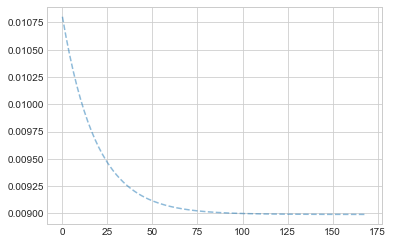

In [587]:
# tolgo i primi 30 valori per visualizzare meglio il grafico 
numPos = epochs-30 # numero ultime posizioni da visualizzare
ZoomOnLastNumber = LossStory[(epochs-numPos):]  # prelevo solo l'ultima parte
plt.clf()
plt.plot(range(numPos), ZoomOnLastNumber, '--', alpha=0.5) 
plt.show()

Mostro solo l'ultima parte del grafico in modo da mostrare se è stato trovato il punto di minimo

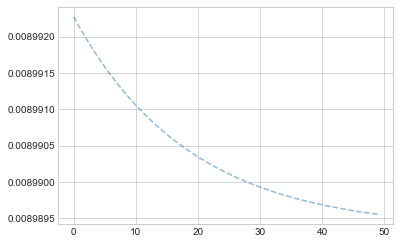

In [588]:
numPos = 50  # visualizzo le ultime 50 posizioni
ZoomOnLastNumber = LossStory[(epochs-numPos):]
plt.clf()
plt.plot(range(numPos), ZoomOnLastNumber, '--', alpha=0.5) 
plt.show()

### Testiamo il modello

In [589]:
with torch.no_grad(): # non abbiamo bisogno dei gradienti in fase di test
    predicted = model2(Variable(torch.from_numpy(x_test))).data.numpy()
    #print(predicted)

In [590]:
# calcolo l'accuratezza
#net = net.eval()  # set eval mode
#acc = torch.accuracy(model2, x_test, y_test, 0.15)
#print("Accuracy on test data = %0.2f%%" % acc)

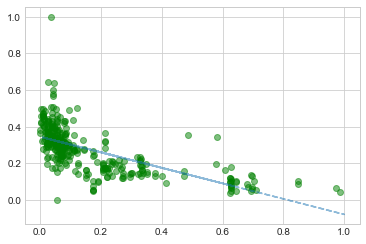

In [591]:
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5) # disegno i punti originali
plt.plot(x_test, predicted, '--', label='Predictions', alpha=0.5) # disegno la linea calcolata dalla rete neurale
plt.show()

### Nota importante sulla relazione tra scaling, convergenza e learningRate

Rispetto all'esercizio precedente è stato effettuato uno scaling delle features. 

Questo perchè se le features sono troppo grandi (valori delle features nell'ordine delle decine o delle centinaia) e il plot dei dati non è 'pulito' la SGD tende a esplodere e ad andare a infinito. 

Per provarlo basta commentare lo scaling di x_data e y_data e notare che dopo poche epoch il loss và subito a infinito e poi a nan.

Per scalare è stato scelto il metodo del minmax scaling. 

E stato necessario aumentare il learningRate a 0.3 e le epochs a 200. 
Si è reso necessario aggiustare il learningRate per lo scaling effettuato, perchè la funzione scelta per determinare il loss è la MSELoss ovvero la Mean Squared Error (errore quadratico medio). Dato che il quadrato di numeri piccoli sono numeri piccolissimi si è reso necessario aumentare il learningRate.
Per lo stesso motivo ho aumentato le epochs. Si potrebbe aumentare solo uno dei due hyperparametri (learningRate o epochs) ma questo avrebbe avuto dei problemi collaterali.
Aumentando solo il learningRate la funzione avrebbe potuto non convergere, mentre aumentando solo le epochs avremmo aumentato inutilmente il tempo di computazione.

In realtà avremmo potuto scegliere anche una terza strada, ovvero aumentare la scala delle features da [0..1] a [0..10]. Questo avrebbe permesso ai numeri di convergere più velocemente verso il loss minimo senza variare molto il learningRate e le epochs. 

Per provare questa strada è possibile usare la variabile Scala attualmente posta a 1.

**Lo scaling, la convergenza e il learningRate sono strettamente collegati tra loro**


Gli algoritmi influenzati molto dallo scaling sono :
k-nearest neighbors
Principal Component Analysis(PCA)
Algoritmi che usano il gradient descent
Tree based models
Linear Discriminant Analysis(LDA)


# FastAi

Dato che linear regression è un algoritmo molto semplice non esiste nessuna implementazione nel framework FastAi